In [15]:
from PIL import Image, ImageFont, ImageDraw
from pathlib import Path

In [16]:
def find_project_root(markers=("pyproject.toml", ".git")) -> Path:
    """
    Descobre a raiz do projeto subindo diretórios até encontrar um marcador.

    Parâmetros:
        markers: nomes de arquivos/pastas que indicam a raiz (ex.: "pyproject.toml", ".git").

    Retorna:
        pathlib.Path apontando para a raiz do projeto, ou o diretório atual como fallback.
    """
    p = Path.cwd().resolve()
    for parent in [p, *p.parents]:
        if any((parent / m).exists() for m in markers):
            return parent
    return p

ROOT = find_project_root()

In [26]:
# --- Configurações ---
DATA_DIR = ROOT / "data"
FONT_PATH = DATA_DIR / "external" / "elis.ttf"
OUTPUT_IMAGE_PATH = DATA_DIR / "raw" / "ocr_test_image.png"

# Palavra "Rosa" em ELiS
# U+0074, U+0068, U+007A, U+0044, U+00CC, U+00B0 em Unicode
# "thzDÌm" em ASCII
SYMBOLS_SEQUENCE = "thzDÌm"
FONT_SIZE = 30
IMAGE_HEIGHT = 64
PADDING = 20 # Espaçamento nas bordas da imagem
SPACING = 10 # Espaçamento entre os glifos


In [27]:
def generate_test_image():
    """Gera uma imagem PNG com uma sequência de glifos"""
    try:
        font = ImageFont.truetype(FONT_PATH, FONT_SIZE)
    except IOError:
        print(f"ERRO: Arquivo de fonte não encontrado em '{FONT_PATH}'. Por favor, atualize o caminho.")
        return

    total_width = PADDING * 2
    for i, symbol in enumerate(SYMBOLS_SEQUENCE):
        # textbbox retorna (left, top, right, bottom)
        bbox = font.getbbox(symbol)
        symbol_width = bbox[2] - bbox[0]
        total_width += symbol_width
        if i < len(SYMBOLS_SEQUENCE) - 1:
            total_width += SPACING

    # Cria a imagem com fundo branco
    image = Image.new('L', (total_width, IMAGE_HEIGHT), 255)
    draw = ImageDraw.Draw(image)

    # Desenha cada símbolo na imagem
    current_x = PADDING
    for symbol in SYMBOLS_SEQUENCE:
        bbox = font.getbbox(symbol)
        symbol_width = bbox[2] - bbox[0]
        symbol_height = bbox[3] - bbox[1]

        # Centraliza verticalmente
        y_position = (IMAGE_HEIGHT - symbol_height) / 2

        draw.text((current_x, y_position), symbol, font=font, fill=0)
        current_x += symbol_width + SPACING

    image.save(OUTPUT_IMAGE_PATH)
    print(f"Imagem de teste salva em '{OUTPUT_IMAGE_PATH}'")
    return image

Imagem de teste salva em '/mnt/x/01-projetos/11-work/11.32-doutorado/DL/projeto_elis/data/raw/ocr_test_image.png'


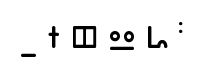

In [28]:
generate_test_image()